In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
write_path = os.getcwd() + '/Output'
corr_df = pd.read_csv(write_path + '/Corr_DF_pearson.csv')
corr_df.rename(columns = {'Unnamed: 0' : 'Country'}, inplace = True)
corr_df.set_index(corr_df.columns[0], inplace=True)

#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['Argentina', 'Barbados', 'Azerbaijan', 'Comoros', 'Greenland',
       'Burkina Faso', 'Sierra Leone', 'Iceland', 'South Africa', 'Samoa',
       ...
       'Grenada', 'North Macedonia', 'Andorra', 'Togo', 'Maldives',
       'Cayman Islands', 'Mauritius', 'Guyana', 'Kenya', 'Poland'],
      dtype='object', name='Country', length=179)
         AgriShareGDP  CreditToAgriFishForest  EmploymentRural  TotalAgri  \
Country                                                                     
0            0.127789                0.410615        -0.150932   0.248310   
1           -0.110341               -0.175745        -0.090697   0.149213   
2           -0.093746               -0.176470        -0.091071   0.242425   
3           -0.122541               -0.230676        -0.119045   0.316890   
4           -0.120088               -0.226058        -0.116662   0.310546   
...               ...                     ...              ...        ...   
174          0.675543               -0.151

In [2]:

tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 200.0, early_exaggeration = 1000, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)
print(new_df_tsne)




c:\Users\smanoles\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


               1st_component 2nd_component
Country                                   
Argentina         552.157776    196.232651
Barbados          790.663025    330.065521
Azerbaijan        223.886795   -884.366028
Comoros          1017.505737     -6.600447
Greenland        1042.715454     25.569054
...                      ...           ...
Cayman Islands   1043.359375   -741.416687
Mauritius         520.903503   -448.693298
Guyana            530.616699   -487.754364
Kenya            1051.259033   -696.207275
Poland           -453.370209   -804.754028

[179 rows x 2 columns]


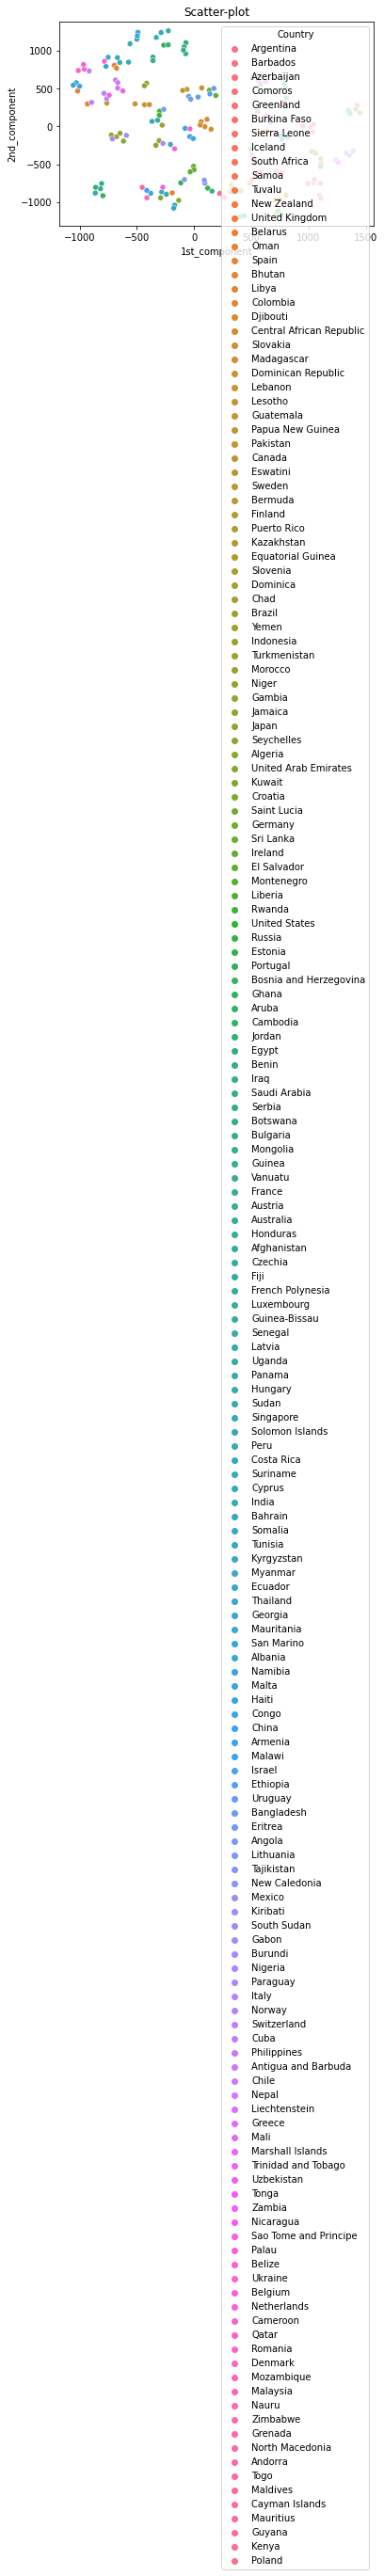

In [3]:
#plotting data

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', hue='Country')
plt.title('Scatter-plot')
plt.show()

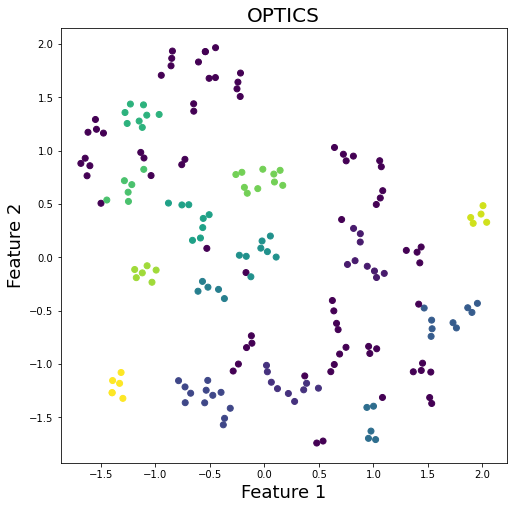

In [15]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.15, min_cluster_size=5, min_samples=5).fit_predict(X_optics)
#labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= optics)


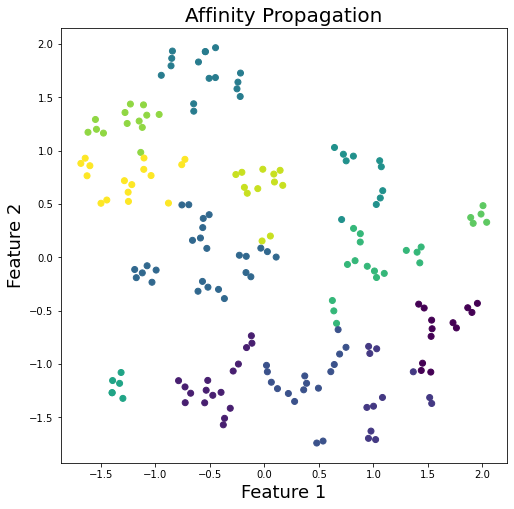

In [17]:

from sklearn.cluster import AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture


X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = AffinityPropagation(damping=0.9).fit(X_optics)
labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('Affinity Propagation',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= labels_optics)


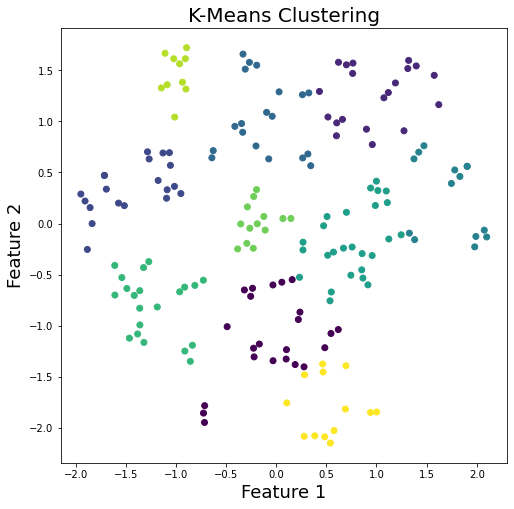

In [ ]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=10).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans[0],X_kmeans[1],c=kmean_clusters)

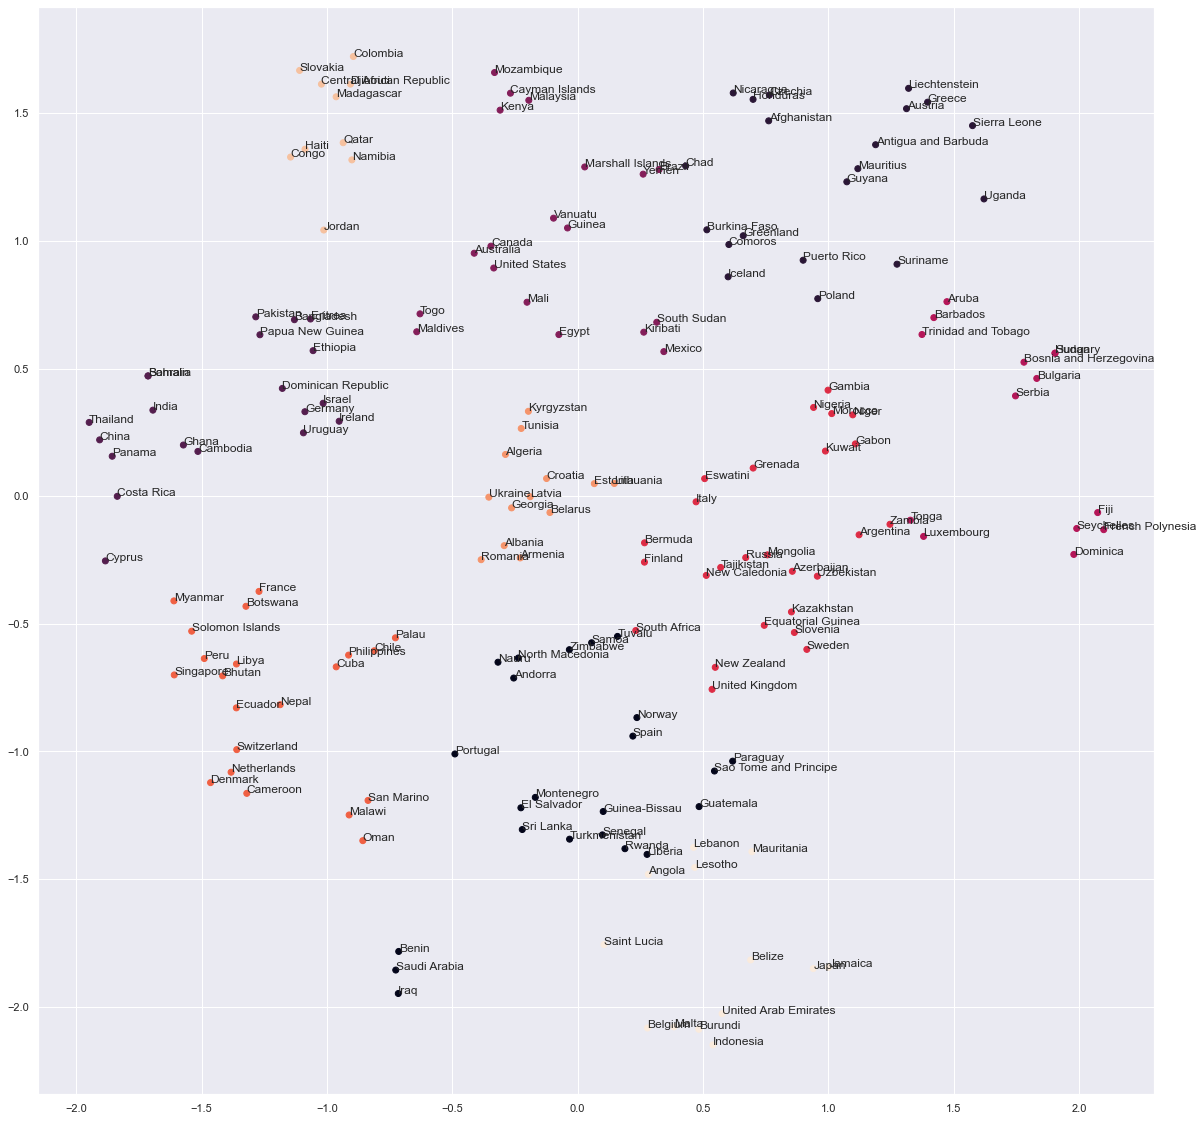

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})


z = X_kmeans[0]
y = X_kmeans[1]
n = new_df_tsne.index.get_level_values(0)
fig, ax = plt.subplots()

ax.scatter(z, y, c=kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
new_df_tsne['Cluster'] = kmean_clusters.tolist()
new_df_tsne

,1st_component,2nd_component,Cluster
Country,,,
Argentina,361.739807,-97.863197,5
Barbados,459.760193,143.034607,4
Azerbaijan,274.204956,-138.356812,5
Comoros,191.021622,224.100601,1
Greenland,209.841171,233.867737,1
...,...,...,...
Cayman Islands,-95.33548,391.982483,3
Mauritius,360.124908,308.228607,1
Guyana,345.677429,293.676056,1
